## 識別まとめ用：ActiveとMotorの従来+TimeSeriese+TDA比較

各被験者ごとにActiveとMotorをまとめたpng  
* ACCURACY\_(被験者名)_(チャンネル数).png  
  
全被験者のActiveとMotorの平均をまとめたpng
* ACCURACY\_mean_(チャンネル数).png 

In [18]:
import numpy as np
import pandas as pd
import sys
import os

# .pyで実行するときは%matplotlib inlineをコメントアウト！！！！
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#args = sys.argv
#PATH = args[1]

# jupyter notebookのときはここで指定
PATH = '../State-2fe_Active/'

PATH_a = '../State-2fe_Active/Result1110method/'
PATH_m = '../State-2fe_Motor/Result1110method/'

all_sub = 'ACCURACY_allsub.csv'
mean_sub = 'ACCURACY_meansub.csv'

# ------- 書き換え ------- #

resultName = 'Result1111AvsM'

# ----------------------- #

# Result[日付]のディレクトリ名・パス
DIR_result = PATH + resultName
PATH_result = DIR_result + '/'

# すでに存在する場合は何もせず，存在していない場合はディレクトリ作成
if not os.path.exists(DIR_result):
    os.mkdir(DIR_result) 
    
vox_index = ['ActiveVoxel', 'MotorVoxel']
sub = ['20181029rn', '20181029su', '20181029tm']

In [27]:
def AcBar(ac_plt, name):

    plt.figure()

    ac_plt.plot.bar(color = ['darkblue', 'lightsteelblue', 'darkred', 'firebrick', 'crimson', 'red', 'palevioletred', 'salmon', 'lightsalmon', 'peachpuff'],
               width = 0.8, figsize = (16,9), rot = 0, fontsize = 15, legend='reverse',
               yticks = [10,20,30,40,50,60,70,80,90,100])

    PATH_plt = PATH + PATH_result + 'ACCURACY_' + name + '.png'
    print(PATH_plt)
    plt.savefig(PATH_plt)
    
    plt.close('all')



In [28]:
########## 各被験者ごとにactiveとmotorを比較 ###########

active_all = pd.read_csv(PATH_a + all_sub, index_col = 0)
motor_all = pd.read_csv(PATH_m + all_sub, index_col = 0)

active_64 = active_all.loc['64ch head coil(64ch)', :]
active_mb = active_all.loc['64ch head coil multi-band(64chMB)', :]

motor_64 = motor_all.loc['64ch head coil(64ch)', :]
motor_mb = motor_all.loc['64ch head coil multi-band(64chMB)', :]

for i in range(len(active_64)):
    
    active = pd.DataFrame(active_64.iloc[i, :]).T
    active.index = [vox_index[0]]
    
    motor = pd.DataFrame(motor_64.iloc[i, :]).T
    motor.index = [vox_index[1]]
    
    cmp = pd.concat([active, motor])
    
    name = sub[i] + '_64ch'
    
    AcBar(cmp, name)
    
for i in range(len(active_mb)):
    
    active = pd.DataFrame(active_mb.iloc[i, :]).T
    active.index = [vox_index[0]]
    
    motor = pd.DataFrame(motor_mb.iloc[i, :]).T
    motor.index = [vox_index[1]]
    
    cmp = pd.concat([active, motor])
    
    name = sub[i] + '_mb'
    
    AcBar(cmp, name)
    
    


../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_20181029rn_64ch.png
../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_20181029su_64ch.png
../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_20181029tm_64ch.png
../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_20181029rn_mb.png
../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_20181029su_mb.png
../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_20181029tm_mb.png


In [29]:
########## 全被験者のactiveとmotorの平均を比較 ###########

active_all = pd.read_csv(PATH_a + mean_sub, index_col = 0)
motor_all = pd.read_csv(PATH_m + mean_sub, index_col = 0)

active_64 = pd.DataFrame(active_all.loc['64ch head coil(64ch)', :]).T
motor_64 = pd.DataFrame(motor_all.loc['64ch head coil(64ch)', :]).T
cmp_64 = pd.concat([active_64, motor_64])
cmp_64.index = vox_index

name_64 = 'mean_64ch'

AcBar(cmp_64, name_64)


active_mb = pd.DataFrame(active_all.loc['64ch head coil multi-band(64chMB)', :]).T
motor_mb = pd.DataFrame(motor_all.loc['64ch head coil multi-band(64chMB)', :]).T
cmp_mb = pd.concat([active_mb, motor_mb])
cmp_mb.index = vox_index

name_mb = 'mean_mb'

AcBar(cmp_mb, name_mb)



../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_mean_64ch.png
../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_mean_mb.png


In [30]:
########## 全被験者，全チャンネルのActiveとmotorの平均を比較 ##########

all_ch = pd.concat([cmp_64, cmp_mb])

all_ch.index = ['64ch / ActiveVoxel', '64ch / MotorVoxel', 'multi-band / ActiveVoxel', 'multi-band / MotorVoxel']

name_mean = 'mean'

AcBar(all_ch, name_mean)

../State-2fe_Active/../State-2fe_Active/Result1111AvsM/ACCURACY_mean.png


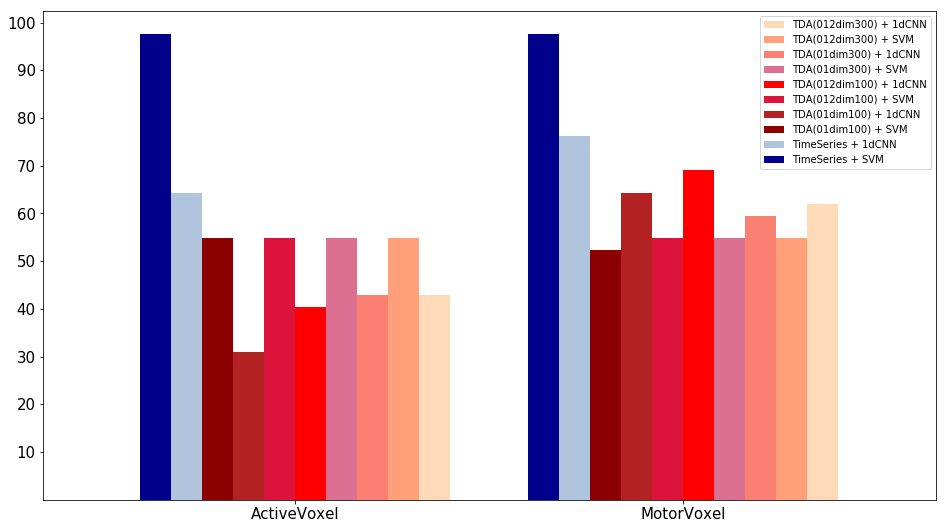

In [26]:
plt.figure()

cmp_64.plot.bar(color = ['darkblue', 'lightsteelblue', 'darkred', 'firebrick', 'crimson', 'red', 'palevioletred', 'salmon', 'lightsalmon', 'peachpuff'],
           width = 0.8, figsize = (16,9), rot = 0, fontsize = 15, legend='reverse',
           yticks = [10,20,30,40,50,60,70,80,90,100])